Integrantes: Mateo Podestá y Jhunnior Sáenz

##  Pregunta 4:

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)

In [200]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
    (LinearDiscriminantAnalysis as LDA ,
    QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 4.a

In [203]:
#Cargamos los datos
Defaul = pd.read_csv('Default-1.csv')
Defaul

,Unnamed: 0,default,student,balance,income
0,0,No,No,730,"44,362"
1,1,No,Yes,817,"12,106"
2,2,No,No,"1,074","31,767"
3,3,No,No,529,"35,704"
4,4,No,No,786,"38,463"
...,...,...,...,...,...
9995,9995,No,No,712,"52,992"
9996,9996,No,No,758,"19,661"
9997,9997,No,No,845,"58,636"
9998,9998,No,No,"1,569","36,669"


In [204]:
variables = Defaul[['income', 'balance']]
design = MS(variables) # Añadimos una constante

# Variables X y Variables y(=1 si no hay default)
X = design.fit_transform(Defaul)
y = Defaul.default == 'Yes'

# Definiendo el modelo logístico
glm = sm.GLM(y, X,family=sm.families.Binomial())

# Estimando el modelo 
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,-12,0,-27,0
income,0,0,4,0
balance,0,0,25,0


In [205]:
probs = results.predict()
probs.mean()

0.03329999999999994

 La probabilidad media de la predicción es 0.03; es decir, el modelo predice que no habrá default

# 4.b

In [246]:
# Usamos este método ya que permite tomar muestras aleatorias para usarlas en train adn test
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    random_state=104,
                                                    test_size=0.4,
                                                    shuffle=True)


In [247]:
X_train

,intercept,income,balance
7260,1,"47,761",119
6870,1,"38,084",391
8771,1,"40,750",830
1843,1,"14,662",722
1709,1,"25,694","2,010"
...,...,...,...
6310,1,"23,957",844
8846,1,"43,202","1,112"
729,1,"35,623",276
5825,1,"13,275","1,498"


In [248]:
y_test

4996    False
5894    False
4295    False
2753    False
6163    False
        ...  
3909    False
8665    False
8657    False
138     False
9668    False
Name: default, Length: 4000, dtype: bool

In [249]:
glm_train = sm.GLM(y_train ,
                    X_train ,
                    family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)

In [260]:
etiquetas_predichas = np.where(probs > 0.5, 'Yes', 'No')
etiquetas_son = np.where(y_test == False, 'No', 'Yes')
confusion_table(etiquetas_predichas, etiquetas_son)

Truth,No,Yes
Predicted,,
No,3845,104
Yes,11,40


In [262]:
error_de_prueba = (3845+40)/(4000)
error_de_prueba

0.97125

# 4.c

In [272]:
import numpy as np
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from sklearn.model_selection import train_test_split
from functools import partial
from sklearn.model_selection import \
     (cross_validate,
      KFold,
      ShuffleSplit)
from sklearn.base import clone
from ISLP.models import sklearn_sm

In [277]:
Defaul = pd.read_csv('Default-1.csv')
Defaul ['default']= Defaul ['default'].replace(['No', 'Yes'],[0, 1]) #se reemplazan los str por int para tener una dummy

Defaul_train, Defaul_valid = train_test_split(Defaul,
                                         test_size=5000,
                                         random_state=104)

In [278]:
hp_mm = MS(['income', 'balance'])
X_train = hp_mm.fit_transform(Defaul_train)
y_train = Defaul_train['default']
model = sm.OLS(y_train, X_train)
results = model.fit()

In [279]:
X_valid = hp_mm.transform(Defaul_valid)
y_valid = Defaul_valid['default']
valid_pred = results.predict(X_valid)
np.mean((y_valid - valid_pred)**2) #error de predicción

0.030105015621086056

##  Pregunta 5:

Tiene una muestra de 1000 observaciones obtenida de
una población de 5000 observaciones (archivo Bootstrap.csv). En esta muestra,
la variable endógena es 𝑦 y las exógenas son 𝑥1,⋯, 𝑥4. Se le pide hacer un
ejercicio de Bootstrap para obtener la distribución (los histogramas) de los
parámetros de la regresión lineal de 𝑦 en las 𝑥.

In [150]:
#Cargamos las librerías
import numpy as np
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from sklearn.model_selection import train_test_split
import pandas as pd
from functools import partial
from sklearn.model_selection import \
     (cross_validate,
      KFold,
      ShuffleSplit)
from sklearn.base import clone
from ISLP.models import sklearn_sm

In [151]:
#Cargamos los datos
bootstrap = pd.read_csv('Bootstrap-1.csv')
bootstrap

,index,x1,x2,x3,x4,y
0,1,0.935019,4.638424,-4.898743,-0.401949,13.115358
1,2,0.681648,5.579980,-4.880013,-0.463971,2.687093
2,3,0.509190,5.647153,-4.990919,-0.438628,-2.707810
3,4,0.485166,5.849231,-4.741958,-0.416480,-3.982740
4,5,0.860652,4.321050,-4.906270,-0.427895,11.832362
...,...,...,...,...,...,...
995,996,0.936063,4.968396,-4.930896,-0.448756,12.145639
996,997,0.933241,4.929771,-4.706880,-0.420264,12.224528
997,998,0.580290,5.276365,-4.947765,-0.443102,0.545732
998,999,0.757199,5.168892,-4.973857,-0.455939,6.168923


In [152]:
bootstrap = bootstrap.drop('index', axis=1)
bootstrap

,x1,x2,x3,x4,y
0,0.935019,4.638424,-4.898743,-0.401949,13.115358
1,0.681648,5.579980,-4.880013,-0.463971,2.687093
2,0.509190,5.647153,-4.990919,-0.438628,-2.707810
3,0.485166,5.849231,-4.741958,-0.416480,-3.982740
4,0.860652,4.321050,-4.906270,-0.427895,11.832362
...,...,...,...,...,...
995,0.936063,4.968396,-4.930896,-0.448756,12.145639
996,0.933241,4.929771,-4.706880,-0.420264,12.224528
997,0.580290,5.276365,-4.947765,-0.443102,0.545732
998,0.757199,5.168892,-4.973857,-0.455939,6.168923


In [153]:
y = df['y'].values
X = df.drop('y', axis=1).values

NameError: name 'df' is not defined

In [ ]:
OLS
def boot_OLS(model_matrix, response, D, idx):
    D_ = D.loc[idx]
    Y_ = D_[response]
    X_ = clone(model_matrix).fit_transform(D_)
    return sm.OLS(Y_, X_).fit().params

In [ ]:
bs_func = partial(boot_OLS, MS(['x1','x2','x3','x4']), 'y')
bs_func

functools.partial(<function boot_OLS at 0x000001C61CFBF240>, ModelSpec(terms=['x1', 'x2', 'x3', 'x4']), 'y')

In [ ]:
#Realizamos el ejercicio de bootstrap 1000 veces. Hagamos que use toda la muestra, y tome 500 elementos en cada paso
rng = np.random.default_rng(0)
bs_ols_est = np.array([bs_func(bootstrap,rng.choice(1000,500,replace=True)) for _ in range(1000)])
bs_ols_est

array([[ 1.14763594e-08,  3.00000000e+01, -3.00000000e+00,
         2.00000002e-01,  1.00000006e-01],
       [ 1.28911921e-08,  3.00000000e+01, -3.00000000e+00,
         2.00000001e-01,  1.00000016e-01],
       [ 1.59930925e-08,  3.00000000e+01, -3.00000000e+00,
         2.00000002e-01,  1.00000011e-01],
       ...,
       [ 2.59930588e-09,  3.00000000e+01, -3.00000000e+00,
         2.00000001e-01,  9.99999978e-02],
       [-1.17530075e-08,  3.00000000e+01, -3.00000000e+00,
         2.00000000e-01,  9.99999841e-02],
       [ 2.32703830e-08,  3.00000000e+01, -3.00000000e+00,
         2.00000003e-01,  1.00000015e-01]])

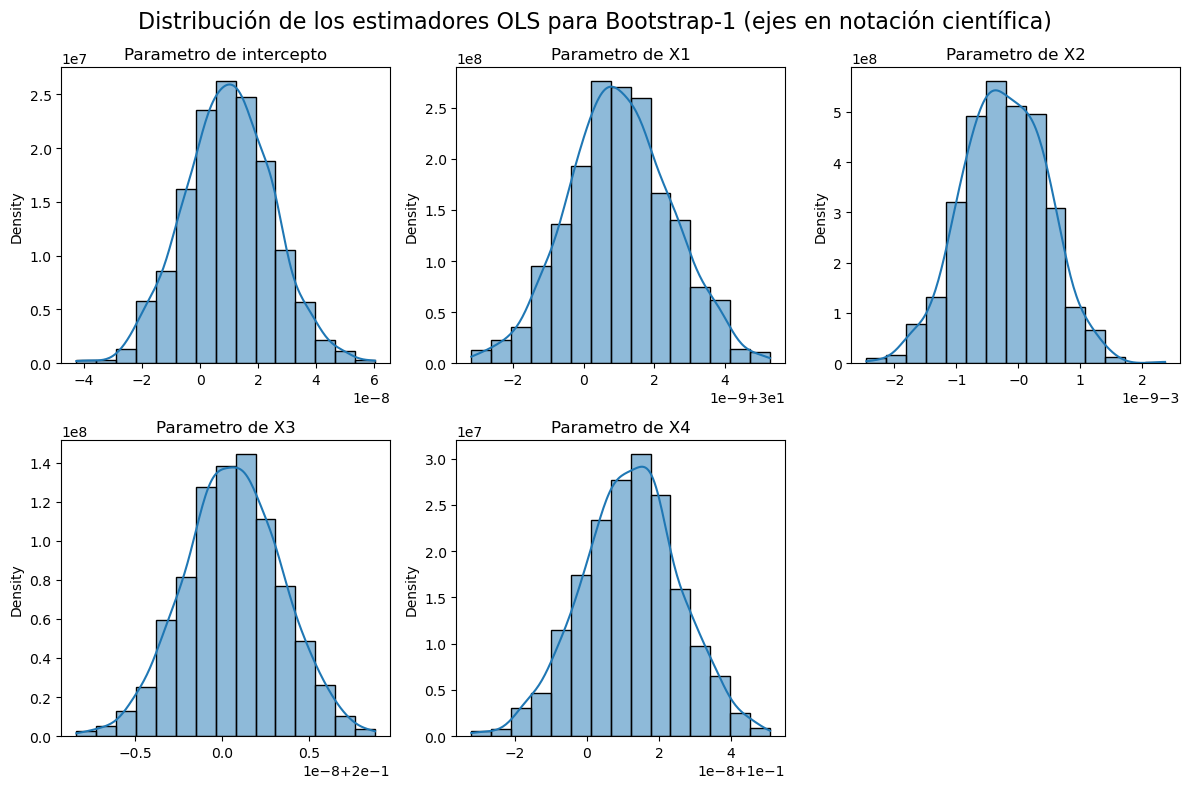

In [ ]:
#Graficamos (usamos un loop por conveniencia)
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

num_param = bs_ols_est.shape[1]
plt.figure(figsize=(12, 8))

for i in range(num_param):
    plt.subplot(2, 3, i + 1)
    sns.histplot(bs_ols_est[:, i], bins=15,stat='density',kde=True)
    if i==0: plt.title(f'Parametro de intercepto')
    else: plt.title(f'Parametro de X{i}')

plt.suptitle('Distribución de los estimadores OLS para Bootstrap-1 (ejes en notación científica)', fontsize=16)
plt.tight_layout()
plt.show()
#Importante: Notar que los ejes están en notación científica

##  Pregunta 6:

In [483]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
    (LinearDiscriminantAnalysis as LDA ,
    QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [484]:

# Lee el archivo CSV con la precisión especificada
Igvl = pd.read_csv('data_IGBVL-1.csv')

Igvl

,date,PX_LAST,LOG_VOLUME
0,8/20/01,"1,346",12
1,8/21/01,"1,347",13
2,8/22/01,"1,347",13
3,8/23/01,"1,351",12
4,8/24/01,"1,360",13
...,...,...,...
5291,10/10/22,"19,931",13
5292,10/11/22,"19,830",14
5293,10/12/22,"19,867",14
5294,10/13/22,"19,966",15


In [485]:
Igvl['Year'] = 2000 + Igvl['date'].str[-2:].astype(int)
Igvl['Rendimiento'] = Igvl['PX_LAST'].diff()
Igvl['Rendimiento'].fillna(0, inplace=True)
Igvl['Direction'] = np.where(Igvl['Rendimiento'] >= 0, 'Up', 'Down') #generamos la variable dicotomica

Igvl

,date,PX_LAST,LOG_VOLUME,Year,Rendimiento,Direction
0,8/20/01,"1,346",12,2001,0,Up
1,8/21/01,"1,347",13,2001,1,Up
2,8/22/01,"1,347",13,2001,-0,Down
3,8/23/01,"1,351",12,2001,4,Up
4,8/24/01,"1,360",13,2001,9,Up
...,...,...,...,...,...,...
5291,10/10/22,"19,931",13,2022,-180,Down
5292,10/11/22,"19,830",14,2022,-101,Down
5293,10/12/22,"19,867",14,2022,37,Up
5294,10/13/22,"19,966",15,2022,99,Up


In [486]:
Igvl.corr()

C:\Users\jhunn\AppData\Local\Temp\ipykernel_9872\865385194.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Igvl.corr()


,PX_LAST,LOG_VOLUME,Year,Rendimiento
PX_LAST,1,0,1,0
LOG_VOLUME,0,1,0,0
Year,1,0,1,-0
Rendimiento,0,0,-0,1


No se ve una correlación significativa entre las variables 'PX_LAST' y 'LOG_VOLUME' lo cual tiene sentido pues el precio no depende del volumen negociado; aunque si se aprecia una correlación bastante alta entre precio y año; entre rendimiento y año se ve una correlación negativa y muy pequeña

In [487]:
allvars = Igvl[['PX_LAST', 'LOG_VOLUME', 'Year']] # Solo nos quedamos con las variables Lags y Volumen
design = MS(allvars) # Definimos una clase llamada Especificacion del Modelo (MS) donde indicamos cuales seran nuestros regresores
X = design.fit_transform(Igvl)  # Seleciona de la base Smarket las variables en design y luego les añade una columna de 1 para el intercepto
y = Igvl.Direction == 'Up' # Generamos la variable dicotomica Y (nuestro objetivo) que tomará el valor de 1 cuando el mercado tuvo un rendimiento positivo respecto al dia anterior
glm = sm.GLM(y,X,family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,1,14,0,1
PX_LAST,-0,0,-3,0
LOG_VOLUME,0,0,7,0
Year,-0,0,-0,1


Se aprecia que el intercepto y el volumen tienen coef positivos, es decir su aumento favorece un 'Up' en el rendimeinto.
Se aprecia que el Precio y el año tienen coef positivos, es decir su aumento favorece un 'Down' en el rendimeinto.

In [488]:
probs = results.predict() #obtenemos las probabilidades previstas de subida o bajada
probs.mean()

0.5347432024169196

In [490]:
labels = np.array(['Down']*5296)
labels[probs>0.5] = "Up"

La función confusion_table() del paquete ISLP resume estas predicciones, mostrando cuántas observaciones se clasificaron correcta o incorrectamente. Nuestra función, que es una adaptación de una función similar en el módulo sklearn.metrics, transpone la matriz resultante e incluye etiquetas de filas y columnas. La función confusion_table() toma como primer argumento las etiquetas predichas y como segundo argumento las etiquetas verdaderas.

In [491]:
confusion_table(labels , Igvl.Direction)

Truth,Down,Up
Predicted,,
Down,594,539
Up,1870,2293


Los elementos diagonales de la matriz de confusión indican predicciones correctas, mientras que los fuera de la diagonal representan predicciones incorrectas. Por lo tanto, nuestro modelo predijo correctamente que el mercado subiría en 2292 días y que bajaría en 597 días, para un total de 597+2292= 2889 predicciones correctas. La función np.mean() se puede utilizar para calcular la fracción de días en los que la predicción fue correcta. En este caso, la regresión logística predijo correctamente el movimiento del mercado el 54,58% de las veces.

In [492]:
(597+2292)/5293

0.5458152276591725

A primera vista, parece que el modelo de regresión logística funciona un poco mejor que las conjeturas aleatorias. Sin embargo, este resultado es engañoso porque entrenamos y probamos el modelo en el mismo conjunto de 5293 observaciones. En otras palabras, 100 − 54,58 = 45,42% es la tasa de error de entrenamiento. Como hemos visto anteriormente, la tasa de error de entrenamiento suele ser demasiado optimista: tiende a subestimar la tasa de error de la prueba. Para evaluar mejor la precisión del modelo de regresión logística en este entorno, podemos ajustar el modelo utilizando parte de los datos y luego examinar qué tan bien predice los datos retenidos. Esto producirá una tasa de error más realista, en el sentido de que en la práctica estaremos interesados en el desempeño de nuestro modelo no en los datos que utilizamos para ajustarlo, sino en los días futuros para los cuales se desconocen los movimientos del mercado. Para implementar esta estrategia, primero creamos un vector dicotomico correspondiente a las observaciones de 2001 a 2014. Luego usamos este vector para crear un conjunto de datos de observaciones de los demás años.

In [493]:
train = (Igvl.Year < 2017)
Smarket_train = Igvl.loc[train]
Smarket_test = Igvl.loc[~train]
Smarket_test.shape

(1458, 6)

El objeto 'train' es un vector de 5293 elementos, correspondiente a las observaciones de nuestro conjunto de datos. Los elementos del vector que corresponden a observaciones que ocurrieron antes de 2017 se establecen en Verdadero, mientras que los que corresponden a observaciones ce despues del 2017 se establecen en Falso. Por tanto, train es una matriz boolean, ya que sus elementos son Verdadero y Falso. Las matrices boolean se pueden utilizar para obtener un subconjunto de filas o columnas de un marco de datos utilizando el método loc. Por ejemplo, el comando `Smarket.loc[~train]` seleccionaría una submatriz del conjunto de datos del mercado de valores, correspondiente sólo a las fechas anteriores a 2005, ya que esas son aquellas para las cuales los elementos de train son Verdaderos. El símbolo `~` se puede utilizar para negar todos los elementos de un vector booleano. Es decir, `~train` es un vector similar a train, excepto que los elementos que son Verdaderos en train se intercambian por False en `~train`, y viceversa. Por lo tanto, `Smarket.loc[~train]` genera un subconjunto de filas del marco de datos del mercado de valores que contiene solo las observaciones para las cuales train es False. El resultado anterior indica que hay 1955 observaciones de este tipo.

Ahora ajustamos un modelo de regresión logística utilizando sólo el subconjunto de observaciones que corresponden a fechas anteriores a 2015. Luego obtenemos probabilidades previstas de que el mercado de valores suba para cada uno de los días de nuestro conjunto de prueba, es decir, para los días posteriores a 2014.

In [494]:
X_train , X_test = X.loc[train], X.loc[~train]
y_train , y_test = y.loc[train], y.loc[~train]
glm_train = sm.GLM(y_train ,
                    X_train ,
                    family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)

Observe que hemos entrenado y probado nuestro modelo en dos conjuntos de datos completamente separados: el entrenamiento se realizó usando solo las fechas anteriores a 2017 y las pruebas se realizaron usando solo las fechas posteriores.

Finalmente, comparamos las predicciones para los años posteriores a 2016 con los movimientos reales del mercado durante ese período. Primero almacenaremos las etiquetas de prueba y entrenamiento (recuerde que y_test es binario).

In [495]:
D = Igvl.Direction
L_train , L_test = D.loc[train], D.loc[~train]

Ahora establecemos un umbral de probabilidad ajustada del 50% para formar nuestras etiquetas predichas.

In [496]:
labels = np.array(['Down']*1458)
labels[probs>0.5] = 'Up'
confusion_table(labels , L_test)

Truth,Down,Up
Predicted,,
Down,616,705
Up,53,84


La precisión de la prueba es aproximadamente del 48%, mientras que la tasa de error es aproximadamente del 52%.

In [498]:
np.mean(labels == L_test), np.mean(labels != L_test)

(0.48010973936899864, 0.5198902606310014)

La notación != significa 'no igual a', por lo que el último comando calcula la tasa de error del conjunto de prueba. Los resultados son bastante decepcionantes: la tasa de precicion de la prueba es del 48%, ¡lo cual es peor que las conjeturas aleatorias! Por supuesto, este resultado no es tan sorprendente, dado que generalmente no se esperaría poder utilizar los rendimientos de días anteriores para predecir el desempeño futuro del mercado, ni tampoco predecirlo usando el año.

Recordamos que el modelo de regresión logística tenía p-values muy decepcionantes asociados con todos los predictores, y que el p-value de year, aunque muy grande, parecí no corresponder. Quizás eliminando dicha variable que parece no ser útil para predecir la dirección, podamos obtener un modelo más eficaz. Después de todo, el uso de predictores que no tienen relación con la respuesta tiende a causar un deterioro en la tasa de error de la prueba (ya que tales predictores provocan un aumento en la varianza sin una correspondiente disminución en el sesgo), por lo que eliminar dichos predictores puede a su vez generar una mejora. A continuación reajustamos la regresión logística utilizando solo precio y volumen, que parecían tener el mayor poder predictivo en el modelo de regresión logística original.

In [502]:
model = MS(['PX_LAST', 'LOG_VOLUME']).fit(Igvl)
X = model.transform(Igvl)
X_train , X_test = X.loc[train], X.loc[~train]
glm_train = sm.GLM(y_train,X_train,family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)
labels = np.array(['Down']*1458)
labels[probs >0.5] = 'Up'
confusion_table(labels , L_test)

Truth,Down,Up
Predicted,,
Down,451,471
Up,218,318


In [503]:
np.mean(labels == L_test), np.mean(labels != L_test)

(0.5274348422496571, 0.4725651577503429)

In [505]:
318/(218+318)

0.5932835820895522

Ahora los resultados parecen ser un poco mejores: el 52.74% de los movimientos diarios han sido predichos correctamente. Vale la pena señalar que en este caso, una estrategia mucho más simple de predecir que el mercado aumentará todos los días también será correcta el 54.58% de las veces. Por tanto, en términos de tasa de error general, el método de regresión logística no es mejor que el enfoque ingenuo. Sin embargo, la matriz de confusión muestra que en los días en que la regresión logística predice un aumento en el mercado, tiene una tasa de precisión del 59%. Esto sugiere una posible estrategia comercial de comprar en los días en que el modelo predice un mercado en aumento y evitar operaciones en los días en que se predice una disminución. Por supuesto, habría que investigar más detenidamente si esta pequeña mejora fue real o simplemente se debió a una casualidad.

# Linear Discriminant Analysis


Comenzamos realizando LDA sobre los datos de Smarket, usando la función LinearDiscriminantAnalysis(), que hemos abreviado LDA(). Ajustamos el modelo utilizando sólo las observaciones anteriores a 2017.

In [506]:
lda = LDA(store_covariance=True)

Dado que el estimador LDA agrega automáticamente una intersección, debemos eliminar la columna correspondiente a la intersección tanto en X_train como en X_test. También podemos usar directamente las etiquetas en lugar de los vectores booleanos y_train.

In [507]:
X_train , X_test = [M.drop(columns=['intercept'])
                    for M in [X_train , X_test]]
lda.fit(X_train , L_train)

LinearDiscriminantAnalysis(store_covariance=True)

Aquí hemos utilizado las listas por comprensión introducidas en la Sección 4. Mirando nuestra primera línea arriba, vemos que el lado derecho es una lista de longitud dos. Esto se debe a que el código para M en $[X_{train}, X_{test}]$ itera sobre una lista de longitud dos. Mientras que aquí recorremos una lista, el método de comprensión de lista funciona cuando recorremos cualquier objeto iterable. Luego aplicamos el método drop() a cada elemento de la iteración, recopilando el resultado en una lista. El lado izquierdo le dice a Python que descomprima esta lista de longitud dos, asignando sus elementos a las variables X_train y X_test. Por supuesto, esto sobrescribe los valores anteriores de X_train y X_test. Habiendo ajustado el modelo, podemos extraer las medias en las dos clases con el atributo media_. Estos son el promedio de cada predictor dentro de cada clase y LDA los utiliza como estimaciones de $\mu_k$. Estos sugieren que existe una tendencia a que los rendimientos de los dos días anteriores sean negativos en los días en que el mercado aumenta, y una tendencia a que los rendimientos de los días anteriores sean positivos en los días en que el mercado baja.

In [508]:
lda.means_

array([[12068.24792758,    15.3891894 ],
       [11571.91277044,    15.57684381]])

Las probabilidades previas estimadas se almacenan en el atributo priors_. El paquete sklearn normalmente usa este _ final para indicar una cantidad estimada cuando se usa el método fit(). Podemos estar seguros de qué entrada corresponde a qué etiqueta mirando el atributo clases_.

In [509]:
lda.classes_

array(['Down', 'Up'], dtype='<U4')

El resultado LDA indica que $\pi_{Down}=0.468$ y  $\pi_{U_p}=0.532$

In [510]:
lda.priors_

array([0.46769151, 0.53230849])

Los vectores discriminantes lineales se pueden encontrar en el atributo scalings_:

In [511]:
lda.scalings_

array([[-1.21320482e-04],
       [ 1.01711945e+00]])

Estos valores proporcionan la combinación lineal de PX_LAST y LOG_VOLUME que se utilizan para formar la regla de decisión LDA. En otras palabras, estos son los multiplicadores de los elementos de $X = x$ en (ec. 24). Si $−0,000121 × PX_LAST + 1.0171 × LOG_VOLUME$ es grande, entonces el clasificador LDA predecirá un aumento del mercado, y si es pequeño, entonces el clasificador LDA predecirá una caída del mercado.

In [512]:
lda_pred = lda.predict(X_test)

In [513]:
confusion_table(lda_pred , L_test)

Truth,Down,Up
Predicted,,
Down,451,471
Up,218,318


También podemos estimar la probabilidad de cada clase para cada punto en un conjunto de entrenamiento. Aplicar un umbral del 50% a las probabilidades posteriores de estar en la clase uno nos permite recrear las predicciones contenidas en lda_pred.

In [515]:
lda_prob = lda.predict_proba(X_test)
np.all(np.where(lda_prob[:,1] >= 0.5, 'Up','Down') == lda_pred)

True

Arriba, utilizamos la función np.where() que crea una matriz con el valor np.where() 'Arriba' para índices donde la segunda columna de lda_prob (la probabilidad posterior estimada de 'Arriba') es mayor que 0,5. Para problemas con más de dos clases, las etiquetas se eligen como la clase cuya probabilidad posterior sea mayor:

In [516]:
np.all(
        [lda.classes_[i] for i in np.argmax(lda_prob , 1)] ==
            lda_pred
        )

True

Si quisiéramos utilizar un umbral de probabilidad posterior distinto del 50% para hacer predicciones, podríamos hacerlo fácilmente. Por ejemplo, supongamos que deseamos predecir una disminución del mercado sólo si estamos muy seguros de que el mercado efectivamente disminuirá ese día (digamos, si la probabilidad posterior es al menos 90%. Sabemos que la primera columna de lda_prob corresponde a la etiqueta Abajo después de haber verificado el atributo clases_, por lo tanto usamos el índice de columna 0 en lugar de 1 como hicimos anteriormente.

In [517]:
np.sum(lda_prob[:,0] > 0.9)

0

¡Ningún día posterior a 2017 alcanza ese umbral!


# Quadratic Discriminant Analysis


Ahora ajustaremos un modelo QDA a los datos de Smarket. QDA se implementa mediante QuadraticDiscriminantAnalysis() en el paquete sklearn, que abreviamos como QDA(). La sintaxis es muy similar a LDA().

In [518]:
qda = QDA(store_covariance=True)
qda.fit(X_train , L_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

La función QDA() volverá a calcular medias_ y priorizaciones_.

In [519]:
qda.covariance_[0]

array([[4.83446702e+07, 3.99018885e+03],
       [3.99018885e+03, 1.19175119e+00]])

La salida contiene los medios del grupo. Pero no contiene los coeficientes de los discriminantes lineales, porque el clasificador QDA implica una función cuadrática, en lugar de lineal, de los predictores. La función predict() funciona exactamente de la misma manera que para LDA.

In [520]:
qda_pred = qda.predict(X_test)
confusion_table(qda_pred , L_test)

Truth,Down,Up
Predicted,,
Down,469,491
Up,200,298


In [522]:
np.mean(qda_pred == L_test)

0.5260631001371742

Curiosamente, las predicciones del QDA son precisas casi el 52.6% de las veces, aunque los datos de 2017-2022 no se utilizaron para ajustar el modelo. Aunque dicho ratios de precición no es muy impresionante

# Naive Bayes


A continuación, ajustamos un naive Bayes de Bayes a los datos de Smarket. La sintaxis es similar a la de LDA() y QDA(). De forma predeterminada, esta implementación GaussianNB() del clasificador naive Bayes modela cada característica cuantitativa utilizando una distribución gaussiana. Sin embargo, también se puede utilizar un método de densidad del núcleo para estimar las distribuciones.

In [523]:
NB = GaussianNB()
NB.fit(X_train , L_train)

GaussianNB()

In [524]:
NB.classes_

array(['Down', 'Up'], dtype='<U4')

In [525]:
NB.class_prior_

array([0.46769151, 0.53230849])

Los parámetros de las características se pueden encontrar en los atributos theta_ y var_. El número de filas es igual al número de clases, mientras que el número de columnas es igual al número de características. A continuación vemos que la media de la característica Px_Last en la clase Down es 12068.24.

In [526]:
NB.theta_

array([[12068.24792758,    15.3891894 ],
       [11571.91277044,    15.57684381]])

In [527]:
NB.var_ #su varianza

array([[4.83177373e+07, 1.24011119e+00],
       [4.95291874e+07, 1.25559520e+00]])

In [528]:
X_train[L_train == 'Down'].mean()

PX_LAST      12,068
LOG_VOLUME       15
dtype: float64

La función GaussianNB() calcula las variaciones utilizando la fórmula 1/n.
Dado que NB() es un clasificador en la biblioteca sklearn, para hacer predicciones se utiliza la misma sintaxis que para LDA() y QDA() anteriores.

In [529]:
nb_labels = NB.predict(X_test)
confusion_table(nb_labels , L_test)

Truth,Down,Up
Predicted,,
Down,179,187
Up,490,602


In [531]:
(179+602)/(179+187+490+602)

0.5356652949245542

Vemos que con este meto hay una mejora de precición, siendo esta el 53.57%.

In [530]:
NB.predict_proba(X_test)[:5]

array([[0.53200216, 0.46799784],
       [0.40416947, 0.59583053],
       [0.47381351, 0.52618649],
       [0.46324188, 0.53675812],
       [0.48159398, 0.51840602]])